Import the most common libraries for Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read the PREP results of 2024

In [2]:
import os
print(os.getcwd())


/home/jj/Datascience/Springboard/Capstones/Capstone2/INE


In [3]:
import pandas as pd

# Define the correct file path
file_path = './2024_PREP_Presidencia/PRES_2024.csv'

# Try loading the CSV with different delimiters and skipping bad lines
try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print("File Loaded Successfully by skipping bad lines")

except Exception as e:
    print("Error reading the file:", e)


File Loaded Successfully by skipping bad lines


/tmp/ipykernel_4479/3485527797.py:8: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


In [4]:
df.head()

,CLAVE_CASILLA,CLAVE_ACTA,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,CONTABILIZADA,MECANISMOS_TRASLADO,CODIGO_INTEGRIDAD,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO,COTEJADA
0,'010000M0100','010000M01009',1,AGUASCALIENTES,NaN,NaN,NaN,NaN,M,0,...,1,D,d2a80f2be642eb86ca1227c4172ca106097ad95f7aa035...,03/06/2024 19:17,03/06/2024 19:17,03/06/2024 19:17,CATD,Escáner,ACTA VMRE,1
1,'010338B0100','010338B01001',1,AGUASCALIENTES,1.0,Jesus Maria,338.0,1.0,B,0,...,1,F-D,3a40b592baa0f73bcdfe08789e6f36f8ad6ea1720bbd04...,03/06/2024 02:14,03/06/2024 02:29,03/06/2024 02:29,CASILLA,Móvil,Acta PREP,1
2,'010338C0100','010338C01001',1,AGUASCALIENTES,1.0,Jesus Maria,338.0,1.0,C,0,...,1,F-D,330045156f5e2abe28f938df81ad6beb0db5655fee88f9...,03/06/2024 08:11,03/06/2024 09:03,03/06/2024 09:04,CATD,Escáner,Acta PREP,0
3,'010338C0200','010338C02001',1,AGUASCALIENTES,1.0,Jesus Maria,338.0,2.0,C,0,...,-,-,-,-,-,-,-,-,-,-
4,'010339B0100','010339B01001',1,AGUASCALIENTES,1.0,Jesus Maria,339.0,1.0,B,0,...,1,F-D,c76b71b0b172a1a0735e577930c2b1fd911279fee257cd...,03/06/2024 01:27,03/06/2024 02:34,03/06/2024 02:35,CASILLA,Móvil,Acta PREP,0


In [5]:
df.isnull().sum()


CLAVE_CASILLA                      0
CLAVE_ACTA                         0
ID_ENTIDAD                         0
ENTIDAD                            0
ID_DISTRITO_FEDERAL              466
DISTRITO_FEDERAL                 466
SECCION                          466
ID_CASILLA                       466
TIPO_CASILLA                       0
EXT_CONTIGUA                       0
UBICACION_CASILLA                  0
TIPO_ACTA                        493
TOTAL_BOLETAS_SOBRANTES          466
TOTAL_PERSONAS_VOTARON           466
TOTAL_REP_PARTIDO_CI_VOTARON     466
TOTAL_VOTOS_SACADOS              466
PAN                                0
PRI                                0
PRD                                0
PAN_PRI_PRD                        0
PAN_PRI                            0
PAN_PRD                            0
PRI_PRD                            0
PVEM                               0
PT                                 0
MORENA                             0
PVEM_PT_MORENA                     0
P

In [6]:
df.columns

Index(['CLAVE_CASILLA', 'CLAVE_ACTA', 'ID_ENTIDAD', 'ENTIDAD',
       'ID_DISTRITO_FEDERAL', 'DISTRITO_FEDERAL', 'SECCION', 'ID_CASILLA',
       'TIPO_CASILLA', 'EXT_CONTIGUA', 'UBICACION_CASILLA', 'TIPO_ACTA',
       'TOTAL_BOLETAS_SOBRANTES', 'TOTAL_PERSONAS_VOTARON',
       'TOTAL_REP_PARTIDO_CI_VOTARON', 'TOTAL_VOTOS_SACADOS', 'PAN', 'PRI',
       'PRD', 'PAN_PRI_PRD', 'PAN_PRI', 'PAN_PRD', 'PRI_PRD', 'PVEM', 'PT',
       'MORENA', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 'PT_MORENA', 'MC',
       'NO_REGISTRADAS', 'NULOS', 'TOTAL_VOTOS_ASENTADO',
       'TOTAL_VOTOS_CALCULADO', 'LISTA_NOMINAL', 'REPRESENTANTES_PP_CI',
       'OBSERVACIONES', 'CONTABILIZADA', 'MECANISMOS_TRASLADO',
       'CODIGO_INTEGRIDAD', 'FECHA_HORA_ACOPIO', 'FECHA_HORA_CAPTURA',
       'FECHA_HORA_VERIFICACION', 'ORIGEN', 'DIGITALIZACION', 'TIPO_DOCUMENTO',
       'COTEJADA'],
      dtype='object')

By reading the dictionary of Features, I notice that not all the features (48) are useful for the objective of predicting the vote preference. So in the first filtering process only 26/48 features will be kept:

In [7]:
features_to_keep = [
    'ID_ENTIDAD', 'ENTIDAD', 'ID_DISTRITO_FEDERAL', 'DISTRITO_FEDERAL', 
    'SECCION', 'TIPO_CASILLA', 'UBICACION_CASILLA', 'TOTAL_BOLETAS_SOBRANTES', 
    'TOTAL_PERSONAS_VOTARON', 'PAN', 'PRI', 'PRD', 'PAN_PRI_PRD', 
    'PAN_PRI', 'PAN_PRD', 'PRI_PRD', 'PVEM', 'PT', 'MORENA', 
    'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 'PT_MORENA', 
    'MC', 'NO_REGISTRADAS', 'NULOS', 'TOTAL_VOTOS_CALCULADO'
]

In [8]:
filtered_df = df[features_to_keep]

In [9]:
df= filtered_df

With this first Filtering process, reducing # of features from 48 to 26 (by elimination of Non value added columns), the elections report looks more readable.

In [10]:
df.head()

,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,TIPO_CASILLA,UBICACION_CASILLA,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,PAN,...,PT,MORENA,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA,PT_MORENA,MC,NO_REGISTRADAS,NULOS,TOTAL_VOTOS_CALCULADO
0,1,AGUASCALIENTES,NaN,NaN,NaN,M,1,NaN,NaN,874,...,19,647,157,1,5,16,64,6,17,2096
1,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,B,2,263,423,69,...,15,193,10,1,1,2,40,0,12,425
2,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,275,412,74,...,19,182,13,0,0,0,42,0,20,412
3,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,-,-,-,...,-,-,-,-,-,-,-,-,-,0
4,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,B,2,261,382,64,...,25,166,15,0,1,3,29,0,14,382


Let's check again the null values!

In [11]:
df.isnull().sum()


ID_ENTIDAD                   0
ENTIDAD                      0
ID_DISTRITO_FEDERAL        466
DISTRITO_FEDERAL           466
SECCION                    466
TIPO_CASILLA                 0
UBICACION_CASILLA            0
TOTAL_BOLETAS_SOBRANTES    466
TOTAL_PERSONAS_VOTARON     466
PAN                          0
PRI                          0
PRD                          0
PAN_PRI_PRD                  0
PAN_PRI                      0
PAN_PRD                      0
PRI_PRD                      0
PVEM                         0
PT                           0
MORENA                       0
PVEM_PT_MORENA               0
PVEM_PT                      0
PVEM_MORENA                  0
PT_MORENA                    0
MC                           0
NO_REGISTRADAS               0
NULOS                        0
TOTAL_VOTOS_CALCULADO        0
dtype: int64

I see a pattern of 466 empty spaces repeated in the variables:
ID_DISTRITO_FEDERAL        466
DISTRITO_FEDERAL           466
SECCION                    466
TOTAL_BOLETAS_SOBRANTES    466
TOTAL_PERSONAS_VOTARON     466

It is probable that those are null polling stations so I will just need to do a Drop to all of the rows, but first let's double check:

In [12]:
# Filter rows where ID_DISTRITO_FEDERAL is empty
empty_rows = df[df['ID_DISTRITO_FEDERAL'].isnull()]

# Check if remaining specified columns are also empty
columns_to_check = ['ID_DISTRITO_FEDERAL', 'DISTRITO_FEDERAL', 'SECCION', 
                    'TOTAL_BOLETAS_SOBRANTES', 'TOTAL_PERSONAS_VOTARON']

# Display rows where any of these columns are empty
empty_check = empty_rows[columns_to_check].isnull().all(axis=1)

# Display the result
empty_rows_filtered = empty_rows[empty_check]
print(empty_rows_filtered)


        ID_ENTIDAD         ENTIDAD  ID_DISTRITO_FEDERAL DISTRITO_FEDERAL  \
0                1  AGUASCALIENTES                  NaN              NaN   
306              1  AGUASCALIENTES                  NaN              NaN   
795              1  AGUASCALIENTES                  NaN              NaN   
1209             1  AGUASCALIENTES                  NaN              NaN   
1212             1  AGUASCALIENTES                  NaN              NaN   
...            ...             ...                  ...              ...   
168165          32       ZACATECAS                  NaN              NaN   
168860          32       ZACATECAS                  NaN              NaN   
170018          32       ZACATECAS                  NaN              NaN   
170022          32       ZACATECAS                  NaN              NaN   
170600          32       ZACATECAS                  NaN              NaN   

        SECCION TIPO_CASILLA  UBICACION_CASILLA TOTAL_BOLETAS_SOBRANTES  \
0           

Correct, 466 of them are coincident in the same empty values. Now let's drop those 466 rows and rewrite the df

In [13]:

# Once confirmed, drop the empty rows
df = df.dropna(subset=['ID_DISTRITO_FEDERAL', 'DISTRITO_FEDERAL', 'SECCION', 
                               'TOTAL_BOLETAS_SOBRANTES', 'TOTAL_PERSONAS_VOTARON'])

Confirm if all empty rows where eliminated

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170944 entries, 1 to 171409
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID_ENTIDAD               170944 non-null  int64  
 1   ENTIDAD                  170944 non-null  object 
 2   ID_DISTRITO_FEDERAL      170944 non-null  float64
 3   DISTRITO_FEDERAL         170944 non-null  object 
 4   SECCION                  170944 non-null  float64
 5   TIPO_CASILLA             170944 non-null  object 
 6   UBICACION_CASILLA        170944 non-null  int64  
 7   TOTAL_BOLETAS_SOBRANTES  170944 non-null  object 
 8   TOTAL_PERSONAS_VOTARON   170944 non-null  object 
 9   PAN                      170944 non-null  object 
 10  PRI                      170944 non-null  object 
 11  PRD                      170944 non-null  object 
 12  PAN_PRI_PRD              170944 non-null  object 
 13  PAN_PRI                  170944 non-null  object 
 14  PAN_PRD  

In [15]:
# List of columns to convert to float
columns_to_convert = [
    'TOTAL_BOLETAS_SOBRANTES', 'TOTAL_PERSONAS_VOTARON', 'UBICACION_CASILLA',
    'NO_REGISTRADAS', 'NULOS', 'TOTAL_VOTOS_CALCULADO',
    'PAN', 'PRI', 'PRD', 'PAN_PRI_PRD', 'PAN_PRI', 'PAN_PRD', 'PRI_PRD', 
    'PVEM', 'PT', 'MORENA', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 
    'PT_MORENA', 'MC'
]

# Convert columns to numeric, forcing errors to NaN to handle incorrect values
for col in columns_to_convert:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [16]:
df.shape

(170944, 27)

In [17]:
df.isnull().sum()

ID_ENTIDAD                     0
ENTIDAD                        0
ID_DISTRITO_FEDERAL            0
DISTRITO_FEDERAL               0
SECCION                        0
TIPO_CASILLA                   0
UBICACION_CASILLA              0
TOTAL_BOLETAS_SOBRANTES    19931
TOTAL_PERSONAS_VOTARON     18893
PAN                        12660
PRI                        12517
PRD                        13865
PAN_PRI_PRD                17643
PAN_PRI                    21809
PAN_PRD                    25272
PRI_PRD                    25489
PVEM                       12639
PT                         12708
MORENA                     12382
PVEM_PT_MORENA             16216
PVEM_PT                    21553
PVEM_MORENA                19842
PT_MORENA                  19890
MC                         12114
NO_REGISTRADAS             28187
NULOS                      13747
TOTAL_VOTOS_CALCULADO        762
dtype: int64

There is an amazing number of NaN values in the polls
28,187 out of 170,944.
As NaN values represent missing votes, filling them with 0 might be the most logical choice. So the NaN values will be captured as "CERO"

In [18]:
df = df.drop(columns=['TOTAL_VOTOS_CALCULADO'])

In [19]:
df.isnull().sum()

ID_ENTIDAD                     0
ENTIDAD                        0
ID_DISTRITO_FEDERAL            0
DISTRITO_FEDERAL               0
SECCION                        0
TIPO_CASILLA                   0
UBICACION_CASILLA              0
TOTAL_BOLETAS_SOBRANTES    19931
TOTAL_PERSONAS_VOTARON     18893
PAN                        12660
PRI                        12517
PRD                        13865
PAN_PRI_PRD                17643
PAN_PRI                    21809
PAN_PRD                    25272
PRI_PRD                    25489
PVEM                       12639
PT                         12708
MORENA                     12382
PVEM_PT_MORENA             16216
PVEM_PT                    21553
PVEM_MORENA                19842
PT_MORENA                  19890
MC                         12114
NO_REGISTRADAS             28187
NULOS                      13747
dtype: int64

In [20]:
# Fill NaN values with 0
df = df.fillna(0)

/tmp/ipykernel_4479/1326670806.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Now is time to clean again the number of columns. I know from PRES_CANDIDATURAS_2024.csv that even when there are 16 'virtual' political parties, there are only 3 politicians competing: Claudia, Xochitl and Maynez.

In [21]:
import pandas as pd

# Define the correct file path
file_path = './2024_PREP_Presidencia/PRES_CANDIDATURAS_2024.csv'

# Try loading the CSV with different delimiters and skipping bad lines
try:
    presidents = pd.read_csv(file_path, on_bad_lines='skip')
    print("File Loaded Successfully by skipping bad lines")

except Exception as e:
    print("Error reading the file:", e)

File Loaded Successfully by skipping bad lines


In [22]:
print('this is the table of presidents splited by political party:')
presidents.head(16)

this is the table of presidents splited by political party:


,PARTIDO_CI,ID_ENTIDAD,ID_DISTRITO_FEDERAL,CANDIDATURA_PROPIETARIA
0,PAN,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz
1,PRI,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz
2,PRD,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz
3,PVEM,Nacional,Nacional,Claudia Sheinbaum Pardo
4,PT,Nacional,Nacional,Claudia Sheinbaum Pardo
5,MC,Nacional,Nacional,Jorge Álvarez Máynez
6,MORENA,Nacional,Nacional,Claudia Sheinbaum Pardo
7,PAN-PRI-PRD,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz
8,PAN-PRI,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz
9,PAN-PRD,Nacional,Nacional,Bertha Xóchitl Gálvez Ruíz


So I will drop the 16 columns and add all the votes in only 3 columns

In [23]:

# Sum the votes for each candidate
df['Xochitl'] = df[['PAN', 'PRI', 'PRD', 'PAN_PRI_PRD', 'PAN_PRI', 'PAN_PRD', 'PRI_PRD']].sum(axis=1)
df['Claudia'] = df[['PVEM', 'PT', 'MORENA', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 'PT_MORENA']].sum(axis=1)
df['Maynez'] = df['MC']

# List of columns to drop
columns_to_drop = [
    'PAN', 'PRI', 'PRD', 'PAN_PRI_PRD', 'PAN_PRI', 'PAN_PRD', 'PRI_PRD', 
    'PVEM', 'PT', 'MORENA', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 
    'PT_MORENA', 'MC'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)


In [24]:
df.head()

,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,TIPO_CASILLA,UBICACION_CASILLA,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,NO_REGISTRADAS,NULOS,Xochitl,Claudia,Maynez
1,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,B,2,263.0,423.0,0.0,12.0,134.0,239.0,40.0
2,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,275.0,412.0,0.0,20.0,119.0,231.0,42.0
3,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,B,2,261.0,382.0,0.0,14.0,114.0,225.0,29.0
5,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,C,2,266.0,377.0,0.0,9.0,116.0,219.0,28.0


In [25]:
# Save the filtered DataFrame to a new CSV file
filtered_csv_file_path = 'filtered_PREP24.csv'
df.to_csv(filtered_csv_file_path, index=False)

print(f'Filtered DataFrame saved to {filtered_csv_file_path}')

Filtered DataFrame saved to filtered_PREP24.csv


In [26]:
# Summarize the votes per candidate
summary = df[['Xochitl', 'Claudia', 'Maynez', 'NULOS']].sum()

# Calculate the total votes across all candidates
total_votes = summary.sum()

# Calculate the percentage of votes per candidate
percentage = (summary / total_votes) * 100

# Combine the summary and percentage into a single DataFrame
summary_df = pd.DataFrame({
    'Total Votes': summary,
    'Percentage': percentage
})

print(summary_df)

         Total Votes  Percentage
Xochitl   15621292.0   27.819730
Claudia   33305398.0   59.313094
Maynez     5851242.0   10.420391
NULOS      1373915.0    2.446785


In [27]:

# Group by state and summarize the votes per candidate
grouped = df.groupby('ENTIDAD')[['Xochitl', 'Claudia', 'Maynez', 'NULOS']].sum()

# Calculate the total votes across all candidates for each state
grouped['Total Votes'] = grouped.sum(axis=1)

# Calculate the percentage of votes per candidate for each state
grouped['Xochitl %'] = (grouped['Xochitl'] / grouped['Total Votes']) * 100
grouped['Claudia %'] = (grouped['Claudia'] / grouped['Total Votes']) * 100
grouped['Maynez %'] = (grouped['Maynez'] / grouped['Total Votes']) * 100
grouped['NULOS %'] = (grouped['NULOS'] / grouped['Total Votes']) * 100

# Round the percentage columns to 2 decimal places
grouped = grouped.round({'Xochitl %': 2, 'Claudia %': 2, 'Maynez %': 2, 'NULOS %': 2 })

# Display the results
grouped.head()

,Xochitl,Claudia,Maynez,NULOS,Total Votes,Xochitl %,Claudia %,Maynez %,NULOS %
ENTIDAD,,,,,,,,,
AGUASCALIENTES,294746.0,270389.0,57054.0,14144.0,636333.0,46.32,42.49,8.97,2.22
BAJA CALIFORNIA,290698.0,862661.0,132914.0,30287.0,1316560.0,22.08,65.52,10.10,2.30
BAJA CALIFORNIA SUR,90838.0,175755.0,26581.0,6443.0,299617.0,30.32,58.66,8.87,2.15
CAMPECHE,62268.0,240693.0,82898.0,9346.0,395205.0,15.76,60.90,20.98,2.36
CHIAPAS,355592.0,1519559.0,162166.0,94634.0,2131951.0,16.68,71.28,7.61,4.44


In [28]:
grouped = grouped.reset_index()
# Display the DataFrame with improved formatting
pd.set_option('display.colheader_justify', 'center')
grouped.head(32)

,ENTIDAD,Xochitl,Claudia,Maynez,NULOS,Total Votes,Xochitl %,Claudia %,Maynez %,NULOS %
0,AGUASCALIENTES,294746.0,270389.0,57054.0,14144.0,636333.0,46.32,42.49,8.97,2.22
1,BAJA CALIFORNIA,290698.0,862661.0,132914.0,30287.0,1316560.0,22.08,65.52,10.10,2.30
2,BAJA CALIFORNIA SUR,90838.0,175755.0,26581.0,6443.0,299617.0,30.32,58.66,8.87,2.15
3,CAMPECHE,62268.0,240693.0,82898.0,9346.0,395205.0,15.76,60.90,20.98,2.36
4,CHIAPAS,355592.0,1519559.0,162166.0,94634.0,2131951.0,16.68,71.28,7.61,4.44
5,CHIHUAHUA,495324.0,744823.0,135550.0,36676.0,1412373.0,35.07,52.74,9.60,2.60
6,CIUDAD DE MEXICO,1862780.0,2978243.0,454084.0,100406.0,5395513.0,34.52,55.20,8.42,1.86
7,COAHUILA,595270.0,813432.0,84184.0,34747.0,1527633.0,38.97,53.25,5.51,2.27
8,COLIMA,102288.0,182063.0,45426.0,7097.0,336874.0,30.36,54.04,13.48,2.11
9,DURANGO,227617.0,402566.0,51520.0,15436.0,697139.0,32.65,57.75,7.39,2.21


In [29]:
# Sort the DataFrame by 'Claudia %' in ascending order
sorted_df = grouped.sort_values(by='Claudia %')

# Display the sorted DataFrame
sorted_df.head(10)

,ENTIDAD,Xochitl,Claudia,Maynez,NULOS,Total Votes,Xochitl %,Claudia %,Maynez %,NULOS %
0,AGUASCALIENTES,294746.0,270389.0,57054.0,14144.0,636333.0,46.32,42.49,8.97,2.22
13,JALISCO,1303587.0,1592942.0,631761.0,84830.0,3613120.0,36.08,44.09,17.49,2.35
18,NUEVO LEON,839701.0,1062016.0,432115.0,49533.0,2383365.0,35.23,44.56,18.13,2.08
10,GUANAJUATO,1057455.0,1223770.0,278420.0,57357.0,2617002.0,40.41,46.76,10.64,2.19
31,ZACATECAS,223133.0,369235.0,124548.0,20082.0,736998.0,30.28,50.10,16.90,2.72
21,QUERETARO,428194.0,585662.0,109805.0,26797.0,1150458.0,37.22,50.91,9.54,2.33
5,CHIHUAHUA,495324.0,744823.0,135550.0,36676.0,1412373.0,35.07,52.74,9.60,2.60
7,COAHUILA,595270.0,813432.0,84184.0,34747.0,1527633.0,38.97,53.25,5.51,2.27
8,COLIMA,102288.0,182063.0,45426.0,7097.0,336874.0,30.36,54.04,13.48,2.11
15,MICHOACAN,562486.0,1033704.0,232501.0,64066.0,1892757.0,29.72,54.61,12.28,3.38


In [30]:
sorted_df.tail(10)

,ENTIDAD,Xochitl,Claudia,Maynez,NULOS,Total Votes,Xochitl %,Claudia %,Maynez %,NULOS %
20,PUEBLA,694569.0,2066399.0,322725.0,94196.0,3177889.0,21.86,65.02,10.16,2.96
1,BAJA CALIFORNIA,290698.0,862661.0,132914.0,30287.0,1316560.0,22.08,65.52,10.10,2.30
29,VERACRUZ,810805.0,2300252.0,281570.0,84198.0,3476825.0,23.32,66.16,8.10,2.42
12,HIDALGO,299831.0,1001963.0,156217.0,36334.0,1494345.0,20.06,67.05,10.45,2.43
28,TLAXCALA,106484.0,486946.0,98955.0,15194.0,707579.0,15.05,68.82,13.99,2.15
4,CHIAPAS,355592.0,1519559.0,162166.0,94634.0,2131951.0,16.68,71.28,7.61,4.44
11,GUERRERO,276953.0,1039283.0,95579.0,45645.0,1457460.0,19.00,71.31,6.56,3.13
22,QUINTANA ROO,129343.0,536134.0,57373.0,16493.0,739343.0,17.49,72.51,7.76,2.23
19,OAXACA,261778.0,1367731.0,119132.0,47299.0,1795940.0,14.58,76.16,6.63,2.63
26,TABASCO,115104.0,811270.0,61696.0,24801.0,1012871.0,11.36,80.10,6.09,2.45


Going back to my full Dataframe, I would like to explore if there is any pattern in Urban/Non Urban polling stations.

In df['Ubicacion_Casilla'], if the value is 1 the polling station is Urban, 2 means Non Urban and 3 out of catalog

In [31]:
df.head()

,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,TIPO_CASILLA,UBICACION_CASILLA,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,NO_REGISTRADAS,NULOS,Xochitl,Claudia,Maynez
1,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,B,2,263.0,423.0,0.0,12.0,134.0,239.0,40.0
2,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,275.0,412.0,0.0,20.0,119.0,231.0,42.0
3,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,B,2,261.0,382.0,0.0,14.0,114.0,225.0,29.0
5,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,C,2,266.0,377.0,0.0,9.0,116.0,219.0,28.0


In [32]:
df['UBICACION_CASILLA'] = df['UBICACION_CASILLA'].replace({
    1: 'Urban polling station',
    2: 'Non-urban polling station',
    3: 'Out of catalog actas'
})

In [33]:
# Agrupar por 'UBICACION_CASILLA' y sumar los votos por partido
grouped_df = df.groupby('UBICACION_CASILLA')[['Xochitl', 'Claudia', 'Maynez']].sum()

# Calcular el total de votos para cada ubicación de casilla
total_votes = grouped_df.sum(axis=1)

# Calcular los porcentajes de voto para cada partido
percentage_df = grouped_df.div(total_votes, axis=0) * 100

# Combinar los totales y los porcentajes en un solo DataFrame
summary_df = pd.concat([grouped_df, percentage_df], keys=['Total Votes', 'Percentage'], axis=1)




In [34]:
summary_df.head()

Total Votes                        Percentage  \
                            Xochitl     Claudia     Maynez    Xochitl     
UBICACION_CASILLA                                                         
Non-urban polling station   3832721.0  10607512.0  1561965.0  23.951216   
Out of catalog actas              0.0         0.0        0.0        NaN   
Urban polling station      11788571.0  22697886.0  4289277.0  30.401929   

                                                 
                           Claudia     Maynez    
UBICACION_CASILLA                                
Non-urban polling station  66.287844   9.760940  
Out of catalog actas             NaN        NaN  
Urban polling station      58.536316  11.061756

I see some trend, but I want something more statistical. Let's create a box plot to visualize the distribution of votes for each candidate in urban and non-urban polling stations.


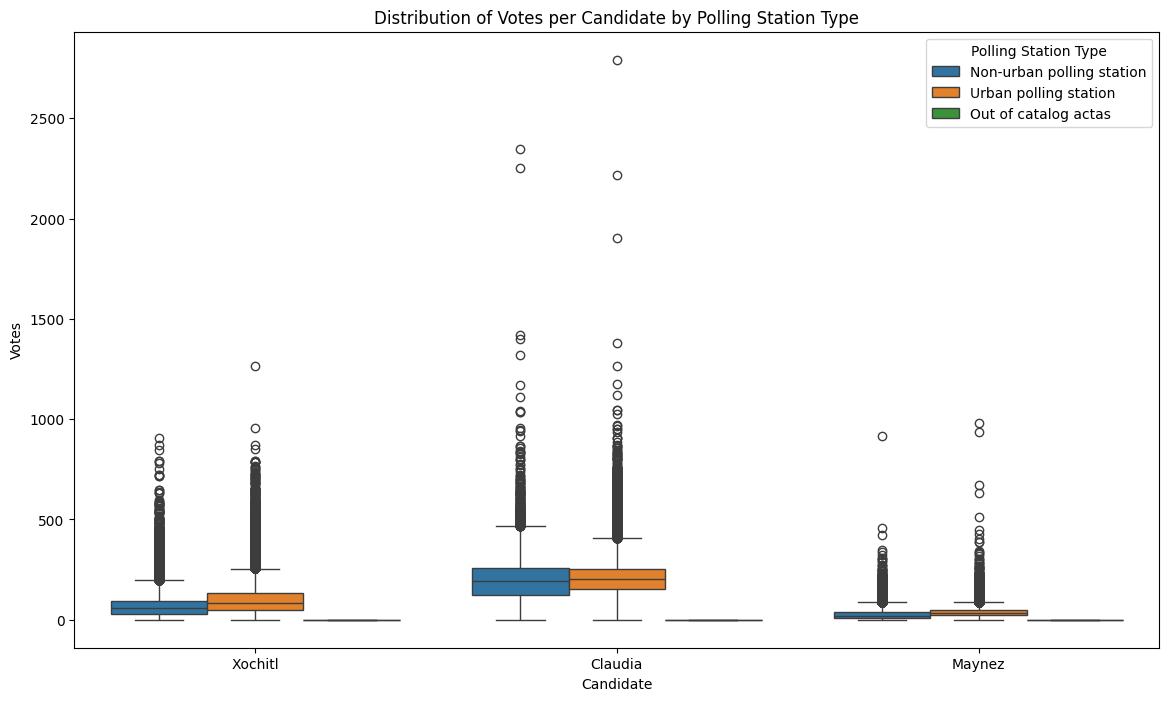

In [35]:
plt.figure(figsize=(14, 8))

# Melting the DataFrame to have a suitable format for seaborn boxplot
df_melted = df.melt(id_vars=['UBICACION_CASILLA'], value_vars=['Xochitl', 'Claudia', 'Maynez'], 
                    var_name='Candidate', value_name='Votes')

# Creating the box plot
sns.boxplot(x='Candidate', y='Votes', hue='UBICACION_CASILLA', data=df_melted)

# Adding titles and labels
plt.title('Distribution of Votes per Candidate by Polling Station Type')
plt.xlabel('Candidate')
plt.ylabel('Votes')
plt.legend(title='Polling Station Type')

# Show the plot
plt.show()

In [36]:
from scipy.stats import ttest_ind

# Filter data for urban and non-urban polling stations
urban_votes = df[df['UBICACION_CASILLA'] == 'Urban polling station']['Claudia'].dropna()
non_urban_votes = df[df['UBICACION_CASILLA'] == 'Non-urban polling station']['Claudia'].dropna()

# Perform independent two-sample t-test for Claudia
t_stat, p_val = ttest_ind(urban_votes, non_urban_votes, equal_var=False)

# Display the t-test results
t_test_results = {'t-statistic': t_stat, 'p-value': p_val}
t_test_df = pd.DataFrame(t_test_results, index=['Claudia']).T
print(t_test_df)

                Claudia  
t-statistic  1.396902e+01
p-value      2.665826e-44


In [37]:
df.shape

(170944, 14)

In [38]:
df.head()

,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,TIPO_CASILLA,UBICACION_CASILLA,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,NO_REGISTRADAS,NULOS,Xochitl,Claudia,Maynez
1,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,B,Non-urban polling station,263.0,423.0,0.0,12.0,134.0,239.0,40.0
2,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,Non-urban polling station,275.0,412.0,0.0,20.0,119.0,231.0,42.0
3,1,AGUASCALIENTES,1.0,Jesus Maria,338.0,C,Non-urban polling station,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,B,Non-urban polling station,261.0,382.0,0.0,14.0,114.0,225.0,29.0
5,1,AGUASCALIENTES,1.0,Jesus Maria,339.0,C,Non-urban polling station,266.0,377.0,0.0,9.0,116.0,219.0,28.0


Add Urban and NoN_Urban total count of polling stations per state!

In [39]:
# Crear una columna para identificar el tipo de estación de votación
df['Urban'] = df['UBICACION_CASILLA'] == 'Urban polling station'
df['Non_Urban'] = df['UBICACION_CASILLA'] == 'Non-urban polling station'

# Group by state and summarize the votes per candidate
grouped = df.groupby('ENTIDAD')[['Xochitl', 'Claudia', 'Maynez', 'NULOS']].sum()

# Contar las estaciones de votación urbanas y no urbanas por estado
urban_counts = df[df['Urban']].groupby('ENTIDAD').size()
non_urban_counts = df[df['Non_Urban']].groupby('ENTIDAD').size()

# Añadir las cuentas de estaciones de votación al DataFrame agrupado
grouped['Urban_polling_stations'] = urban_counts
grouped['Non_urban_polling_stations'] = non_urban_counts

# Reemplazar NaN con 0 en las columnas de conteo de estaciones de votación
grouped['Urban_polling_stations'] = grouped['Urban_polling_stations'].fillna(0)
grouped['Non_urban_polling_stations'] = grouped['Non_urban_polling_stations'].fillna(0)

# Calcular el total de votos entre todos los candidatos por cada estado
grouped['Total Votes'] = grouped[['Xochitl', 'Claudia', 'Maynez', 'NULOS']].sum(axis=1)

# Calcular el porcentaje de votos por candidato para cada estado
grouped['Xochitl %'] = (grouped['Xochitl'] / grouped['Total Votes']) * 100
grouped['Claudia %'] = (grouped['Claudia'] / grouped['Total Votes']) * 100
grouped['Maynez %'] = (grouped['Maynez'] / grouped['Total Votes']) * 100
grouped['NULOS %'] = (grouped['NULOS'] / grouped['Total Votes']) * 100

# Redondear las columnas de porcentaje a 2 decimales
grouped = grouped.round({'Xochitl %': 2, 'Claudia %': 2, 'Maynez %': 2, 'NULOS %': 2})

# Display the results
grouped.head(32)

grouped= grouped.reset_index()

In [40]:
grouped.to_csv('grouped_by_state_2024.csv', index=False)